### Gather Tutorial

This tutorial is simple way to intoduce you with the Gather class. Also, it tell you about attributes and some helpful methods. <br>
You rescue disclose the Gather and Survey classes dependence. It is for that reason I highly recomend to examine the [Survey Tutorial](#link) first. <br>
After studying of the Gather Tutorial you could create the Gather object, know about it structure and could make the base seismic data processing.

Tutorial reading takes N minutes.

### Content

[Intro](#Intro) <br>
[Starting](#Starting) <br>
[Attributes](#Attributes) <br>
[General Methods](#General-Methods)<br>
[Normalization Methods](#Normalization-Methods) <br>
[Muting](#Muting) <br>
[Conclusion](#Conclusion) <br>

In [4]:
import sys # delete after finish
sys.path.append('..') # delete after finish

from seismicpro import Survey
import matplotlib.pyplot as plt

### Intro

We use Survey class for make simple image of SEG-Y file. This image don't contain any trace data, only trace headers.
For trace data extraction we use the Gather class.

Gather class load needful information about SEG-Y file from Survey class, such as headers, path to seg-y file etc. After load the trace data from the SEG-Y file.
Gather load trace data only for indicated `header_index` value. That's important point, because the header_index specify when the Survey class are created.

Why we dont load trace data with Survey class?
SEG-Y files could be very-very huge. Better way is to work with the meaningful chunk. That's what makes Gather class.

### Starting
You will get to know two methods of the creation a Gather class example and learn about Gather structure.

We need to create the Survey class first. All same as in the Survey tutorial.

In [63]:
sgy_path = './data/small_survey.sgy'
header_cols = ["TraceNumber", "offset", 'CDP'] # порезать до необходимого минимума
survey = Survey(sgy_path, header_index='FieldRecord', header_cols=header_cols)

1


We specified `header_cols` as list of the trace headers.
`header_index` also could received list of the trace headers.

#### get_gather
main method for create the Gather object.

To create the Gather with `get_gather` method we need specify `header_index`'s value. `header_index` is FieldRecord in our case. <br>
Traces data with that trace header value will be extracted only.

Let's see what unique value of `header_index` the Survey has.

In [ ]:
survey.headers.index.drop_duplicates()

Now choise one of them and specify it in `get_gather` method. 

In [64]:
gather = survey.get_gather(index=111918)

What's happend?
`get_gather` load all traces with `FieldRecord` (Survey's `header_index`) equal to 111918 (specified in `get_gather`).

Let's see information about created gather with `info()` method.

In [65]:
gather.info()


Parent survey path:          ./data/small_survey.sgy
Parent survey name:          small_survey

Number of traces:            1728
Trace length:                3000 samples
Sample rate:                 2.0 ms
Times range:                 [0.0 ms, 5998.0 ms]
Offsets range:               [79 m, 4914 m]

Index name(s):               FieldRecord
Index value:                 111918
Gather sorting:              None

Gather statistics:
Number of dead traces:       3
mean | std:                        0.00 | 0.51      
 min | max:                      -30.30 | 21.94     
 q01 | q99:                       -1.59 | 1.60      



We see that Gather crated from the Survey named 'small_survey' and based on SEG-Y files located at './data/small_survey.sgy'.

Gather object contain 1728 traces with 3000 samples collecting with 2 ms intervals. Itervals range (or Times range) from 0 ms to 5998 ms. <br>
All of 1728 traces have offset range from 79 to 4914 meters.

Traces in `Gather` indexed by `FieldRecord` and have the FieldRecord value is 111918 only. Gather not sorted. <br>

Gather statistics shows common information about all trace data loaded by the Gather and auto calculated when `info()` called.
Gather have 3 dead trace. It's trace with alike value only.

<b> Notes </b>
If Gather created from the Survey with limits then will be loading only part of trace.

#### samle_gather

`sample_gather` randomly choose one of `header_index` value and create the Gather containing all traces where `header_index` is equal to chosen value.

In [ ]:
gather = survey.sample_gather()
gather.info() # maybe remove this string is good idea

You could see difference between Gathers created with `get_gather` and `sample_gather` methods. Key diff is `Index value`.

Hope you could freely create the Gather now.

### Attributes

Let discuss about most useful attributes of Gather class

<b>`headers`</b> - `pandas.Dataframe` containing the trace headers we specified when creating the `Survey`. In contrast with Survey the Gather contain headers with included trace only.

In [ ]:
gather.headers

`headers` Dataframe indexed by `FieldRecord`. Indexing of `headers` specified when Survey created and cann't be changed via the Gather.

`TRACE_SEQUENCE_FILE` added to headers automatically when the Survey is created and point at sequence number of trace in SEG-Y file.  /// убрать в Survey?

<b>`data`</b> - `numpy.array` containing the trace data of all traces in Gather.

In [ ]:
gather.data

You could check shape of the `data` array and make certain that the shape of array is (`Number of traces`, `Trace length`)

In [ ]:
gather.data.shape

<b>`samples`</b> - array of times when the trace record is done, ms

In [ ]:
gather.samples

<b>`sample_rate` </b> - sample interval for each trace, ms

In [ ]:
gather.sample_rate

We learned about the main attributes of Gather class

`mask` - пропущено в данном туториале, т.к. использует в задачах пикировки, которая не прописывается в данном туториале.

### General Methods

We talk about common methods in this block.

#### <i>plot </i>

plot methods uses for vizualization trace data information. Now we realize gray color map only.

In [ ]:
gather.plot()

Along the Y-axis we shows samples. Along the X-axis we shows trace number. <br>
Gray color map means that bigger value is black, lower is white.

///
Метод простой, поэтому я скуп на слова.
Что хотелось бы видеть. Шкалу значений справа от графика, выбор colormap, возможность указания по осям других значений. например перевести samples из штук в ms.

#### <i>sort </i>

sort the traces in the Gather by `headers` value.<br>
`sort` works in ascending order always.

In [ ]:
gather = survey.sample_gather().sort(by='CDP') # будем добавлять сортировку по убыванию? стоит ли засорять issue такоё херней?
gather.plot()

<b>Notes</b> `sort` is inplace method. It's mean that `gather.data` changes trace order.

Also, the Gather attribute `sort_by` now shows the header used in sorting.

In [ ]:
gather.sort_by

#### <i>copy </i>

make the gather copy.

Most methods work inplace and change the trace data. Good practice to keep Gather's data safe is make a copy and work with copied gather.

Now we have gather example which we sorted by CDP in the sort block. We will make a copy of this gather and sort the original Gather by `offset`.

In [ ]:
gather_copy = gather.copy()
gather.sort(by='offset')
gather.plot()

Now plot the copied Gather and shows that copied Gather still sorted by `CDP`.

In [ ]:
gather_copy.plot()

Hereinafter we will often use copy methods. Hope you will too.

#### <i>dump </i>

save the `Gather` as file in SEG-Y format on the disk. <br>
File will contain the trace headers from `gather.headers` and the trace data from `gather.data`.

In [17]:
gather.dump(path='./data/', name='test_gather')

Parameters: `path` specified directory for saved files, `name` specified name or will used survey `Parent survey name` from gather info.<br>
By default file will save trace headers from `gather.headers` only. If you want to save other trace headers from parent SEG-Y with `copy_header=True`.<br>
`gather.dump(path='./data/', name='test_gather', copy_header=True)`

### Normalization Methods

I tell you data normalization methods in this block. These methods helpful to prepare data before using it in ML models.

All methods works inplace. Use the copy method to save the original data unchanged.

<b>Notes:</b> all normaliztion methods have two main modes. Modes aren't compatible.
1. The tracewise and set with `tracewise=True`. In this way normalization calcs by the separate trace.
2. Using global statistics of the Survey and need calculate Survey's statistic first. Set with `use_global=True`.

#### <i>scale_standard </i>

Normalize the gather data by moving mean to zero and variance to 1.

In [24]:
gather_scaled = gather.copy()

gather_scaled.scale_standard()
print(f'Mean of all trace is {gather_scaled.data.mean():.2f}')
print(f'Standart deviation of all trace is {gather_scaled.data.std():.2f}')

Mean of all trace is -0.00
Standart deviation of all trace is 1.00


Normalization methods work with all trace data. I use histograms for data vizualization.<br>
First plot shows unnormalize data histograms.

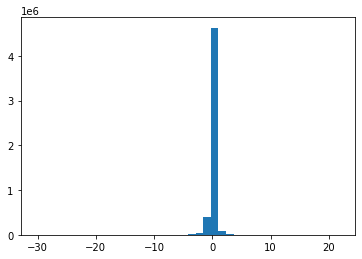

In [36]:
_ = plt.hist(gather.data.ravel(), bins=40)

Second plot shows normalize data histogram.

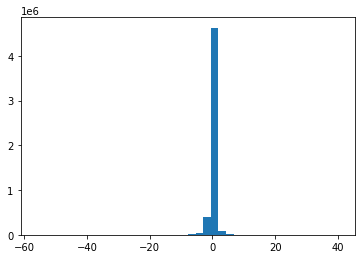

In [37]:
_ = plt.hist(gather_scaled.data.ravel(), bins=40)

You could see that histogram haven't big difference. When we see gather info at begins of this Tutorial you may have noticed mean equal to zero and std equal to 0.51. For that reason `scale_standart` don't change mean and raise variance.

Example how to use global statistics.

/// нужен ли он тут?

Calculating statistics for survey small_survey:   0%|          | 0/8640 [00:00<?, ?it/s]

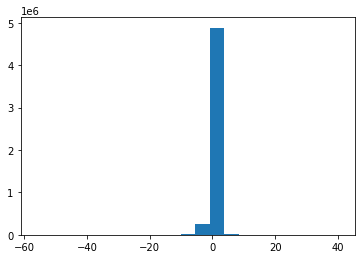

In [30]:
survey.collect_stats()
gather_scaled = gather.copy()
gather_scaled.scale_standard(use_global=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=20)

#### <i>scale_maxabs </i>

Normalize the gather data by maximum absolute value. 'Tracewise' and 'using global' modes are present.

In [38]:
gather_scaled = gather.copy()

gather_scaled.scale_maxabs()
print(f'Min of all trace is {gather_scaled.data.min():.2f}')
print(f'Max of all trace is {gather_scaled.data.max():.2f}')

Min of all trace is -1.00
Max of all trace is 1.00


Ploting normalized data to better understand this normalize method.

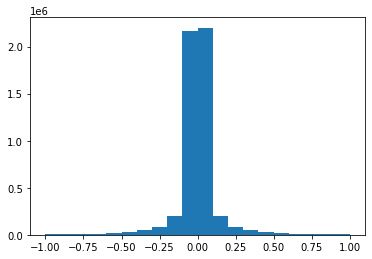

In [41]:
_ = plt.hist(gather_scaled.data.ravel(), bins=20)

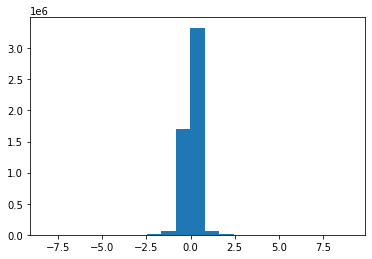

In [42]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.01, q_max=0.99)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

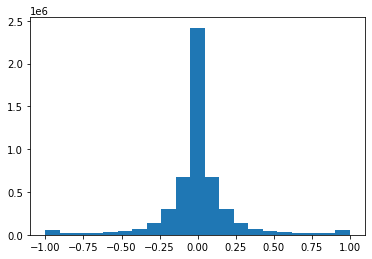

In [43]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.01, q_max=0.99, clip=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>scale_minmax </i>

In [ ]:
gather_scaled = gather.copy()

gather_scaled.scale_minmax()
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>qet_quantile </i>

return quantile
убрать в низ блока нормализации
упомянуть не более

In [ ]:
gather.get_quantile(0.01)

could return requested quantile of each trace in Gather if `tracewise=True`

In [ ]:
gather.get_quantile(0.01, tracewise=True)

could use Survey statistic if its already calculated with `Survey.collect_stats()` <br>
`gather.get_quantile(0.01, use_global=True)`

In [ ]:
survey.collect_stats()
gather.get_quantile(0.01, use_global=True)

### Muting

subblock with `mute` and `create_muter` methods

First create `Muter` object with `create_muter` method

only `from_point` mode explain

Trace with offset from 127 m to 4949 m presented only.


In [72]:
gather_muted = gather.copy() # если я не отсортировал по оффсету то при создании мьютера коррект sort(by='offset').
offsets = [127, 1500, 2500, 4949]
times = [500, 2000, 2000, 6000]
points = {'offsets': offsets, 'times': times}
muter = gather_muted.create_muter('points', **points)

Second mute еру traces in `Gather` with `Muter` object

In [73]:
gather_muted.mute(muter, fill_value=0);

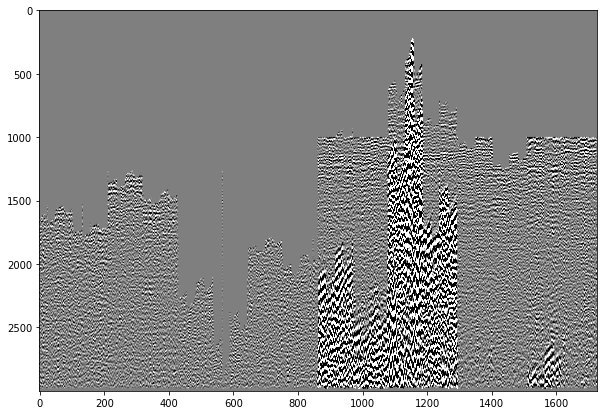

In [74]:
gather_muted.plot()

There are a bit confused to pick point by this plot.
Samples on the Y axis and sequence number of the trace on the X axis.
To convert times to samples we could divide times by samples rate. But convert 

We shows only one mode of muting in this tutorial. To get more information about `first_breaks` and `file` modes read [documentation] of SeismicPro 2.0

### Conclusion

I glad that you read it again. Hope you read both Survey and Gather tutorial and have intuition how SeismicPro works with seismic data.

I don't touch many methods of Gather class, because this methods wants deep understanding of seismic. You could read documention to learn more about it.
Also, we prepare some real-world tasks with SeismicPro and you acquaint [here]
If you ready to resolve end-to-end ML tasks with seismic data be great to check othe tutorials.

If you still have any question you could free contact with our team by [...].

To return to tutorials list [click here]